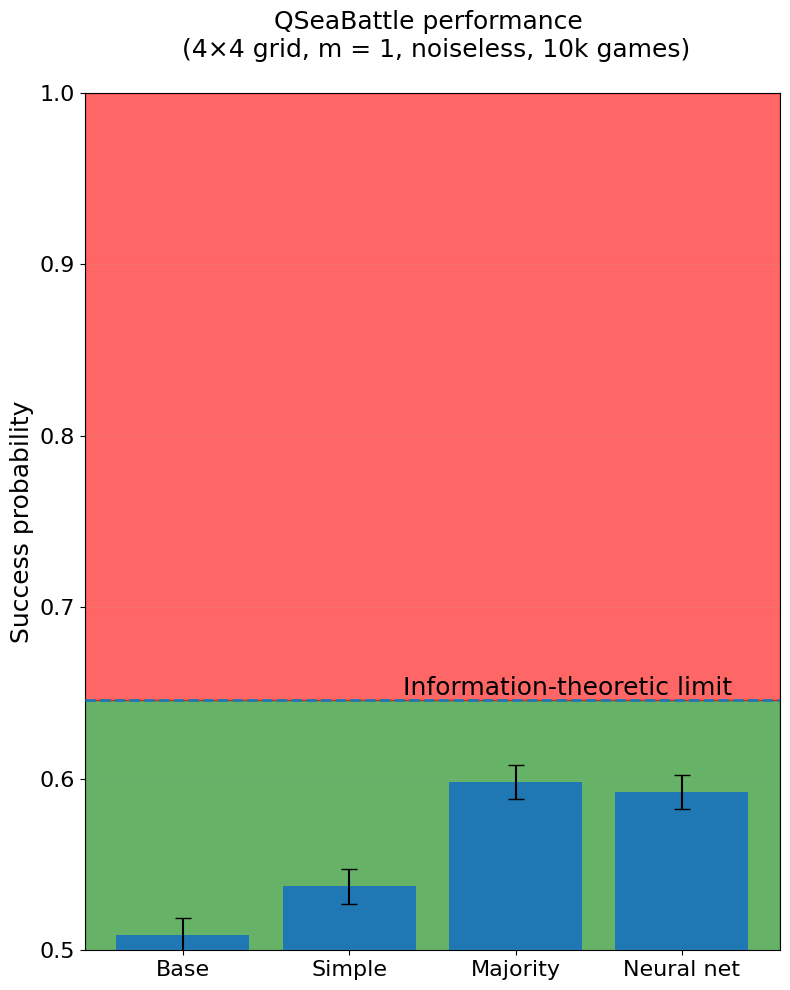

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# Data: 4x4, m=1, noiseless
# -----------------------------
players = ["Base", "Simple", "Majority", "Neural net"]

means = np.array([
    0.5090,  # Base (random)
    0.5372,  # Simple
    0.5982,  # Majority
    0.5924,  # Neural network
])

stderr = np.array([
    0.01,
    0.01,
    0.01,
    0.01,
])

# Information-theoretic limit (IC bound)
info_limit = 0.6461033863

x = np.arange(len(players))

# -----------------------------
# Figure
# -----------------------------
plt.figure(figsize=(8, 10))

# Background shading (very mild)
plt.axhspan(0.0, info_limit, color="green", alpha=0.6, zorder=0)
plt.axhspan(info_limit, 1.0, color="red", alpha=0.6, zorder=0)

# Bars with error bars
plt.bar(
    x,
    means,
    yerr=stderr,
    capsize=6,
    linewidth=1.0,
    zorder=3
)

# Information-theoretic limit line
plt.axhline(
    info_limit,
    linestyle="--",
    linewidth=2,
    zorder=4
)

# Annotation for the bound
plt.text(
    x[-1] + 0.3,
    info_limit,
    "Information-theoretic limit",
    ha="right",
    va="bottom",
    fontsize=18
)

# Axes formatting
plt.xticks(x, players, fontsize=16)
plt.yticks(fontsize=16)
plt.ylabel("Success probability", fontsize=18)
plt.title("QSeaBattle performance \n (4×4 grid, m = 1, noiseless, 10k games)\n",
    fontsize=18)

plt.ylim(0.5, 1.0)
plt.grid(axis="y", alpha=0.15)

plt.tight_layout()
plt.show()



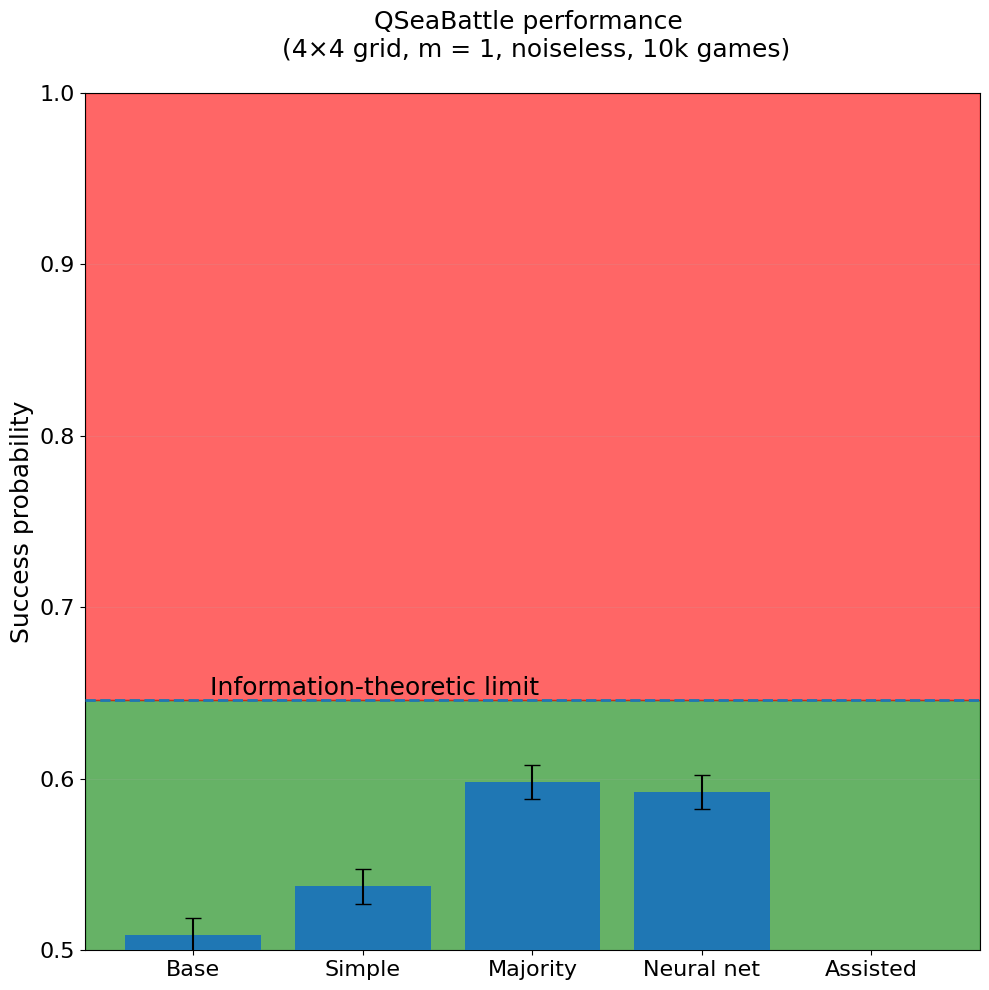

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# Data: 4x4, m=1, noiseless
# -----------------------------
players = ["Base", "Simple", "Majority", "Neural net", "Assisted"]

means = np.array([
    0.5090,  # Base (random)
    0.5372,  # Simple
    0.5982,  # Majority
    0.5924,  # Neural network
    0
])

stderr = np.array([
    0.01,
    0.01,
    0.01,
    0.01,
    0
])

# Information-theoretic limit (IC bound)
info_limit = 0.6461033863

x = np.arange(len(players))

# -----------------------------
# Figure
# -----------------------------
plt.figure(figsize=(10, 10))

# Background shading (very mild)
plt.axhspan(0.0, info_limit, color="green", alpha=0.6, zorder=0)
plt.axhspan(info_limit, 1.0, color="red", alpha=0.6, zorder=0)

# Bars with error bars
plt.bar(
    x,
    means,
    yerr=stderr,
    capsize=6,
    linewidth=1.0,
    zorder=3
)

# Information-theoretic limit line
plt.axhline(
    info_limit,
    linestyle="--",
    linewidth=2,
    zorder=4
)

# Annotation for the bound
plt.text(
    x[0] + 0.1,
    info_limit,
    "Information-theoretic limit",
    ha="left",
    va="bottom",
    fontsize=18
)

# Axes formatting
plt.xticks(x, players, fontsize=16)
plt.yticks(fontsize=16)
plt.ylabel("Success probability", fontsize=18)
plt.title("QSeaBattle performance \n (4×4 grid, m = 1, noiseless, 10k games)\n",
    fontsize=18)

plt.ylim(0.5, 1.0)
plt.grid(axis="y", alpha=0.15)

plt.tight_layout()
plt.show()

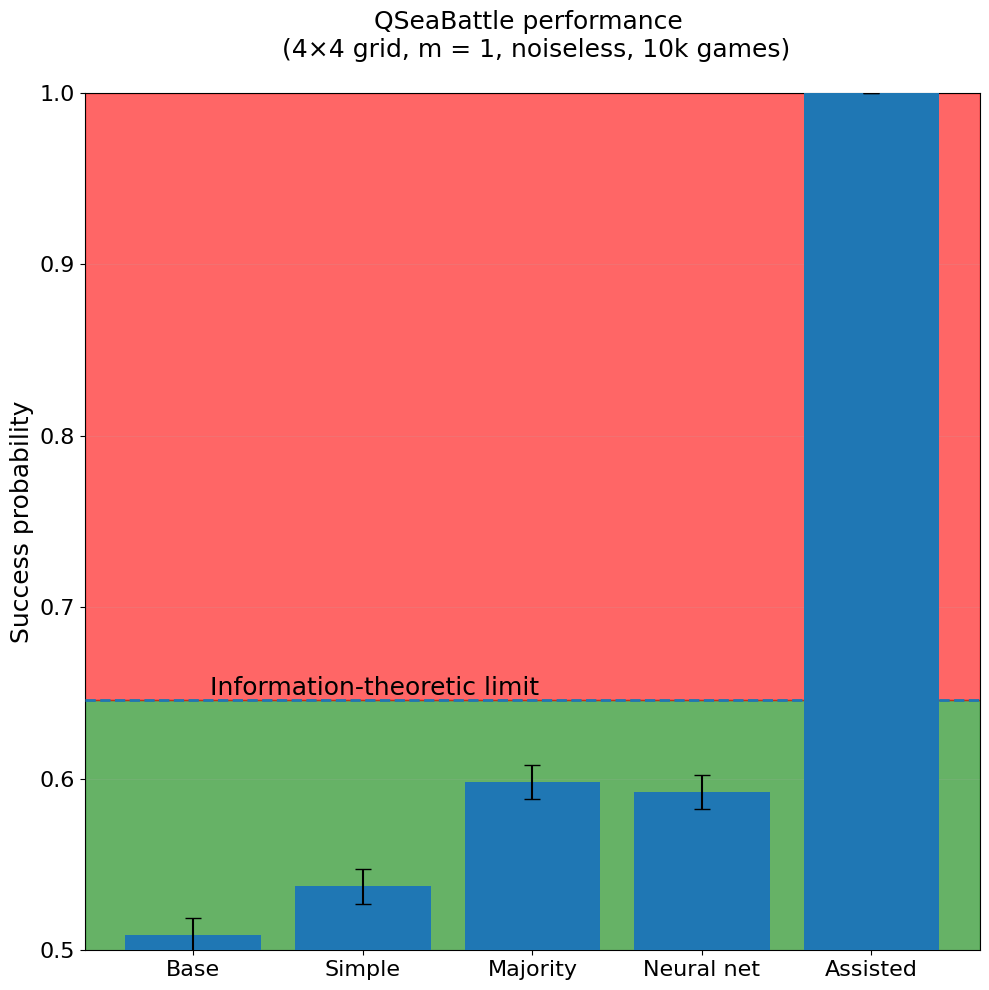

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# Data: 4x4, m=1, noiseless
# -----------------------------
players = ["Base", "Simple", "Majority", "Neural net", "Assisted"]

means = np.array([
    0.5090,  # Base (random)
    0.5372,  # Simple
    0.5982,  # Majority
    0.5924,  # Neural network
    1
])

stderr = np.array([
    0.01,
    0.01,
    0.01,
    0.01,
    0
])

# Information-theoretic limit (IC bound)
info_limit = 0.6461033863

x = np.arange(len(players))

# -----------------------------
# Figure
# -----------------------------
plt.figure(figsize=(10, 10))

# Background shading (very mild)
plt.axhspan(0.0, info_limit, color="green", alpha=0.6, zorder=0)
plt.axhspan(info_limit, 1.0, color="red", alpha=0.6, zorder=0)

# Bars with error bars
plt.bar(
    x,
    means,
    yerr=stderr,
    capsize=6,
    linewidth=1.0,
    zorder=3
)

# Information-theoretic limit line
plt.axhline(
    info_limit,
    linestyle="--",
    linewidth=2,
    zorder=4
)

# Annotation for the bound
plt.text(
    x[0] + 0.1,
    info_limit,
    "Information-theoretic limit",
    ha="left",
    va="bottom",
    fontsize=18
)

# Axes formatting
plt.xticks(x, players, fontsize=16)
plt.yticks(fontsize=16)
plt.ylabel("Success probability", fontsize=18)
plt.title("QSeaBattle performance \n (4×4 grid, m = 1, noiseless, 10k games)\n",
    fontsize=18)

plt.ylim(0.5, 1.0)
plt.grid(axis="y", alpha=0.15)

plt.tight_layout()
plt.show()

In [4]:
import sys
import pandas as pd
sys.path.append("../src")
import Q_Sea_Battle as QSB

In [36]:
results_list = []
field_size = 2**13
noise_level = 0.0
p_high_values = [float(n/100) for n in range(75,100,1)]
for p_high in p_high_values:
    ref = QSB.expected_win_rate_assisted(field_size = field_size, 
                                        comms_size=1,
                                        channel_noise=noise_level,
                                        p_high=p_high)
    ref_log = np.log2(ref - 0.5)
    
    ic_bound = QSB.limit_from_mutual_information(field_size=field_size,
                                                    comms_size=1,
                                                    channel_noise=noise_level)
    ic_log = np.log2(ic_bound - 0.5)
    # Store results in list
    results_list.append({
        'player_type': 'assisted/P_high= '+str(p_high),
        'field_size': field_size,
        'noise_level': noise_level,
        'reference': ref,
        'information_constraint': ic_bound,
        'reference_log2': ref_log,
        'information_constraint_log2': ic_log

    })

# Create DataFrame from collected results
results_df = pd.DataFrame(results_list)

print("Tournament simulations completed.")
print("\n" + "="*100)
print("="*100)
print(results_df.to_string(index=False, float_format='%.4f'))

print("="*100)

Tournament simulations completed.

          player_type  field_size  noise_level  reference  information_constraint  reference_log2  information_constraint_log2
assisted/P_high= 0.75        8192       0.0000     0.5000                  0.5001        -27.0000                     -14.0000
assisted/P_high= 0.76        8192       0.0000     0.5000                  0.5001        -25.5288                     -14.0000
assisted/P_high= 0.77        8192       0.0000     0.5000                  0.5001        -24.1132                     -14.0000
assisted/P_high= 0.78        8192       0.0000     0.5000                  0.5001        -22.7490                     -14.0000
assisted/P_high= 0.79        8192       0.0000     0.5000                  0.5001        -21.4328                     -14.0000
 assisted/P_high= 0.8        8192       0.0000     0.5000                  0.5001        -20.1611                     -14.0000
assisted/P_high= 0.81        8192       0.0000     0.5000                  0

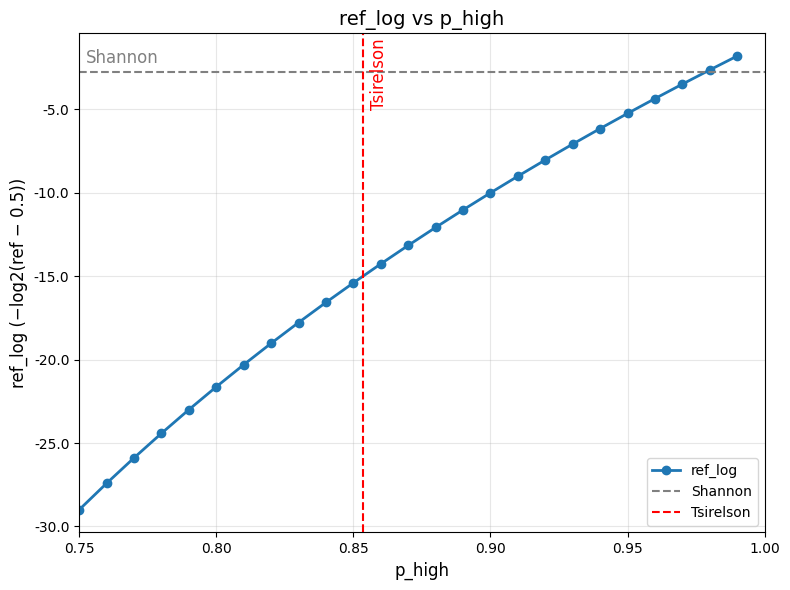

In [65]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

# Plot ref_log versus p_high
p_high_arr = np.array(p_high_values, dtype=float)
ref_log_vals = results_df["reference_log2"].to_numpy()

# Constant lines
ic_log_line = float(ic_log)
p_high_marker = (1 + np.sqrt(2)/2) / 2

plt.figure(figsize=(8, 6))
plt.plot(p_high_arr, ref_log_vals, marker="o", linewidth=2, label="ref_log")
plt.axhline(ic_log_line, linestyle="--", color="gray", linewidth=1.5, label="Shannon")
plt.axvline(p_high_marker, linestyle="--", color="red", linewidth=1.5,
            label="Tsirelson")

plt.xlabel("p_high", fontsize=12)
plt.ylabel("ref_log (−log2(ref − 0.5))", fontsize=12)
plt.title("ref_log vs p_high", fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend()

# Ensure the vertical line is visible in the chosen domain
plt.xlim(0.75, 1)

# Anchored labels on the lines
ax = plt.gca()
x_min, x_max = ax.get_xlim()
y_min, y_max = ax.get_ylim()
x_pad = 0.01 * (x_max - x_min)
y_pad = 0.01 * (y_max - y_min)

# "Shannon" label: left, just above the horizontal line
plt.text(x_min + x_pad, ic_log_line + y_pad, "Shannon",
         ha="left", va="bottom", fontsize=12, color="gray")

# "Tsirelson" label: near top, rotated beside the vertical line
plt.text(p_high_marker + x_pad, y_max - y_pad, "Tsirelson",
         rotation=90, ha="left", va="top", fontsize=12, color="red")

# Freeze y-ticks to xx.y format
ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))

plt.tight_layout()
plt.show()


In [42]:
import numpy as np
import pandas as pd
import math

# --- settings ---
results_list = []
field_size = 2**2
noise_level = 0.0
m = 1
p_high_values = [n / 100 for n in range(75, 100, 1)]

n2 = field_size * field_size
exponent = int(math.log2(n2))  # = log2(n^2), exact for power-of-2 n^2

def ic_limit_large_n2(n2: int, m: int, channel_noise: float) -> float:
    """IC limit p for very large n2 using asymptotic approx when r is tiny."""
    # channel capacity in bits/use for BSC(c): 1 - H(c)
    def H_bin(x: float) -> float:
        if x <= 0.0 or x >= 1.0:
            return 0.0
        return -x * math.log2(x) - (1.0 - x) * math.log2(1.0 - x)

    cap = 1.0 - H_bin(channel_noise)
    m_eff = m * cap

    if m_eff <= 0.0:
        return 0.5

    r = m_eff / float(n2)

    # For very small r, use p = 0.5 + sqrt(r ln 2 / 2)
    # (works extremely well when p is close to 0.5)
    if r < 1e-6:
        delta = math.sqrt(r * math.log(2.0) / 2.0)
        return 0.5 + delta

    # Otherwise fall back to the library method (your existing function)
    return QSB.limit_from_mutual_information(
        field_size=int(math.isqrt(n2)),
        comms_size=m,
        channel_noise=channel_noise,
    )

for p_high in p_high_values:
    # Assisted expected win rate (your existing function is fine for 2^13)
    ref = QSB.expected_win_rate_assisted(
        field_size=field_size,
        comms_size=m,
        channel_noise=noise_level,
        p_high=p_high,
    )

    # Stable log2(ref - 0.5) computed analytically:
    # ref - 0.5 = 0.5 * (2 p_high - 1)^(log2(n2))
    base = 2.0 * p_high - 1.0
    if base <= 0.0:
        ref_log = float("-inf")
    else:
        ref_log = -1.0 + exponent * math.log2(base)

    ic_bound = ic_limit_large_n2(n2=n2, m=m, channel_noise=noise_level)

    # Stable log2(ic_bound - 0.5) with guard
    eps = ic_bound - 0.5
    ic_log = math.log2(eps) if eps > 0.0 else float("-inf")

    results_list.append({
        "player_type": f"assisted / p_high={p_high:.2f}",
        "field_size": field_size,
        "noise_level": noise_level,
        "reference": ref,
        "information_constraint": ic_bound,
        "reference_log2": ref_log,
        "information_constraint_log2": ic_log,
    })

results_df = pd.DataFrame(results_list)
print(results_df.to_string(index=False, float_format="%.6f"))


           player_type  field_size  noise_level  reference  information_constraint  reference_log2  information_constraint_log2
assisted / p_high=0.75           4     0.000000   0.531250                0.646103       -5.000000                    -2.774939
assisted / p_high=0.76           4     0.000000   0.536558                0.646103       -4.773666                    -2.774939
assisted / p_high=0.77           4     0.000000   0.542515                0.646103       -4.555875                    -2.774939
assisted / p_high=0.78           4     0.000000   0.549172                0.646103       -4.346005                    -2.774939
assisted / p_high=0.79           4     0.000000   0.556582                0.646103       -4.143501                    -2.774939
assisted / p_high=0.80           4     0.000000   0.564800                0.646103       -3.947862                    -2.774939
assisted / p_high=0.81           4     0.000000   0.573882                0.646103       -3.758640      

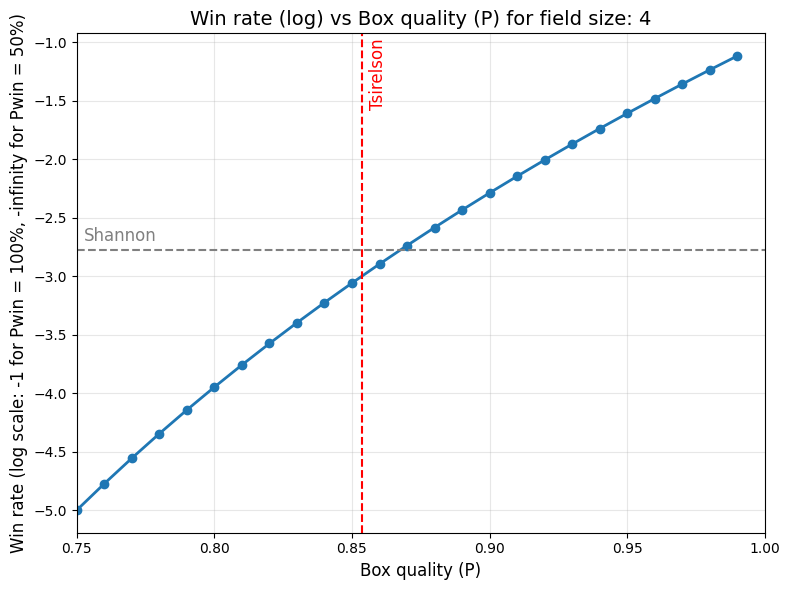

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

# Plot ref_log versus p_high
p_high_arr = np.array(p_high_values, dtype=float)
ref_log_vals = results_df["reference_log2"].to_numpy()

# Constant lines
ic_log_line = float(ic_log)
p_high_marker = (1 + np.sqrt(2)/2) / 2

plt.figure(figsize=(8, 6))
plt.plot(p_high_arr, ref_log_vals, marker="o", linewidth=2, label="ref_log")
plt.axhline(ic_log_line, linestyle="--", color="gray", linewidth=1.5, label="Shannon")
plt.axvline(p_high_marker, linestyle="--", color="red", linewidth=1.5,
            label="Tsirelson")

plt.xlabel("Box quality (P)", fontsize=12)
plt.ylabel("Win rate (log scale: -1 for Pwin = 100%, -infinity for Pwin = 50%)", fontsize=12)
plt.title(f"Win rate (log) vs Box quality (P) for field size: {field_size}", fontsize=14)
plt.grid(True, alpha=0.3)

# Ensure the vertical line is visible in the chosen domain
plt.xlim(0.75, 1)

# Anchored labels on the lines
ax = plt.gca()
x_min, x_max = ax.get_xlim()
y_min, y_max = ax.get_ylim()
x_pad = 0.01 * (x_max - x_min)
y_pad = 0.01 * (y_max - y_min)

# "Shannon" label: left, just above the horizontal line
plt.text(x_min + x_pad, ic_log_line + y_pad, "Shannon",
         ha="left", va="bottom", fontsize=12, color="gray")

# "Tsirelson" label: near top, rotated beside the vertical line
plt.text(p_high_marker + x_pad, y_max - y_pad, "Tsirelson",
         rotation=90, ha="left", va="top", fontsize=12, color="red")

# Freeze y-ticks to xx.y format
ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))

plt.tight_layout()
plt.show()


In [ ]:
def calculate(field_size):
    import numpy as np
    import pandas as pd
    import math
    from matplotlib.ticker import FormatStrFormatter

    # --- settings ---
    results_list = []
    noise_level = 0.0
    m = 1
    p_high_values = [n / 100 for n in range(75, 100, 1)]

    n2 = field_size * field_size
    exponent = int(math.log2(n2))  # = log2(n^2), exact for power-of-2 n^2

    def ic_limit_large_n2(n2: int, m: int, channel_noise: float) -> float:
        """IC limit p for very large n2 using asymptotic approx when r is tiny."""
        # channel capacity in bits/use for BSC(c): 1 - H(c)
        def H_bin(x: float) -> float:
            if x <= 0.0 or x >= 1.0:
                return 0.0
            return -x * math.log2(x) - (1.0 - x) * math.log2(1.0 - x)

        cap = 1.0 - H_bin(channel_noise)
        m_eff = m * cap

        if m_eff <= 0.0:
            return 0.5

        r = m_eff / float(n2)

        # For very small r, use p = 0.5 + sqrt(r ln 2 / 2)
        # (works extremely well when p is close to 0.5)
        if r < 1e-6:
            delta = math.sqrt(r * math.log(2.0) / 2.0)
            return 0.5 + delta

        # Otherwise fall back to the library method (your existing function)
        return QSB.limit_from_mutual_information(
            field_size=int(math.isqrt(n2)),
            comms_size=m,
            channel_noise=channel_noise,
        )

    for p_high in p_high_values:
        # Assisted expected win rate (your existing function is fine for 2^13)
        ref = QSB.expected_win_rate_assisted(
            field_size=field_size,
            comms_size=m,
            channel_noise=noise_level,
            p_high=p_high,
        )

        # Stable log2(ref - 0.5) computed analytically:
        # ref - 0.5 = 0.5 * (2 p_high - 1)^(log2(n2))
        base = 2.0 * p_high - 1.0
        if base <= 0.0:
            ref_log = float("-inf")
        else:
            ref_log = -1.0 + exponent * math.log2(base)

        ic_bound = ic_limit_large_n2(n2=n2, m=m, channel_noise=noise_level)

        # Stable log2(ic_bound - 0.5) with guard
        eps = ic_bound - 0.5
        ic_log = math.log2(eps) if eps > 0.0 else float("-inf")

        results_list.append({
            "player_type": f"assisted / p_high={p_high:.2f}",
            "field_size": field_size,
            "noise_level": noise_level,
            "reference": ref,
            "information_constraint": ic_bound,
            "reference_log2": ref_log,
            "information_constraint_log2": ic_log,
        })

    results_df = pd.DataFrame(results_list)

    # Plot ref_log versus p_high
    p_high_arr = np.array(p_high_values, dtype=float)
    ref_log_vals = results_df["reference_log2"].to_numpy()

    # Constant lines
    ic_log_line = float(ic_log)
    p_high_marker = (1 + np.sqrt(2)/2) / 2

    plt.figure(figsize=(8, 6))
    plt.plot(p_high_arr, ref_log_vals, marker="o", linewidth=2, label="ref_log")
    plt.axhline(ic_log_line, linestyle="--", color="gray", linewidth=1.5, label="Shannon")
    plt.axvline(p_high_marker, linestyle="--", color="red", linewidth=1.5,
                label="Tsirelson")

    plt.xlabel("Box quality (P)", fontsize=12)
    plt.ylabel("Win rate (log scale: -1 for Pwin = 100%, -infinity for Pwin = 50%)", fontsize=12)
    plt.title(f"Win rate (log) vs Box quality (P) for field size: {field_size}", fontsize=14)
    plt.grid(True, alpha=0.3)

    # Ensure the vertical line is visible in the chosen domain
    plt.xlim(0.75, 1)

    # Anchored labels on the lines
    ax = plt.gca()
    x_min, x_max = ax.get_xlim()
    y_min, y_max = ax.get_ylim()
    x_pad = 0.01 * (x_max - x_min)
    y_pad = 0.01 * (y_max - y_min)

    # "Shannon" label: left, just above the horizontal line
    plt.text(x_min + x_pad, ic_log_line + y_pad, "Shannon",
            ha="left", va="bottom", fontsize=12, color="gray")

    # "Tsirelson" label: near top, rotated beside the vertical line
    plt.text(p_high_marker + x_pad, y_max - y_pad, "Tsirelson",
            rotation=90, ha="left", va="top", fontsize=12, color="red")

    # Freeze y-ticks to xx.y format
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))

    plt.tight_layout()
    plt.show()


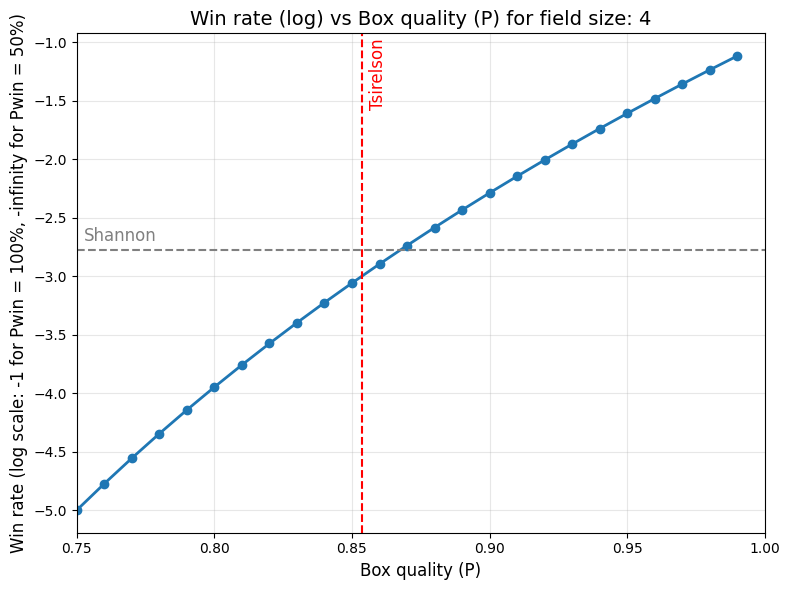

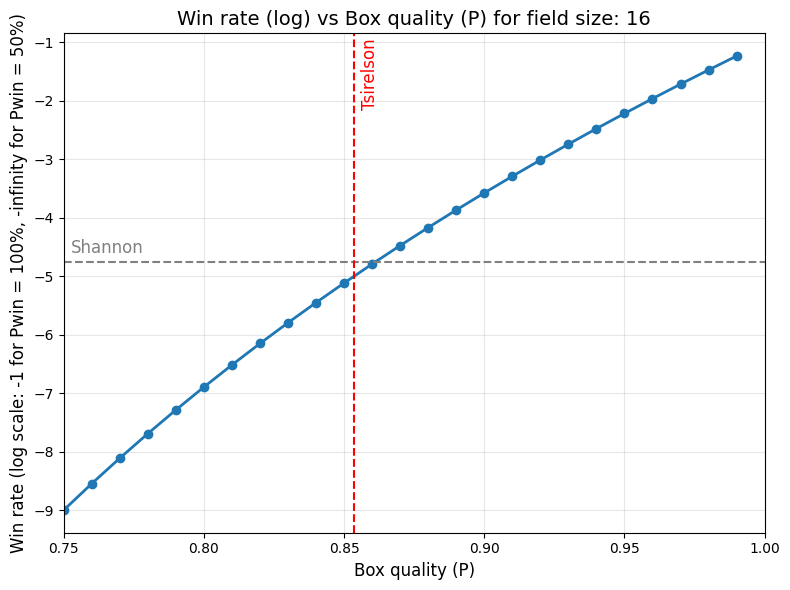

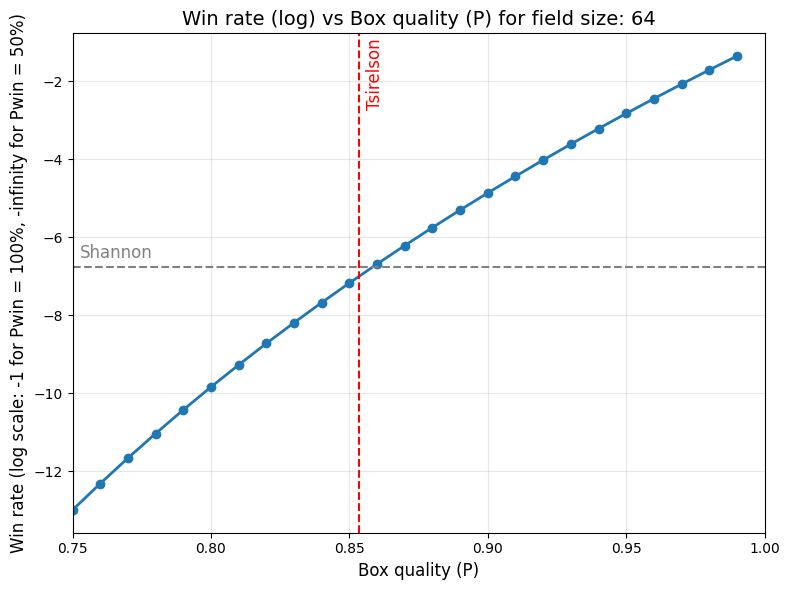

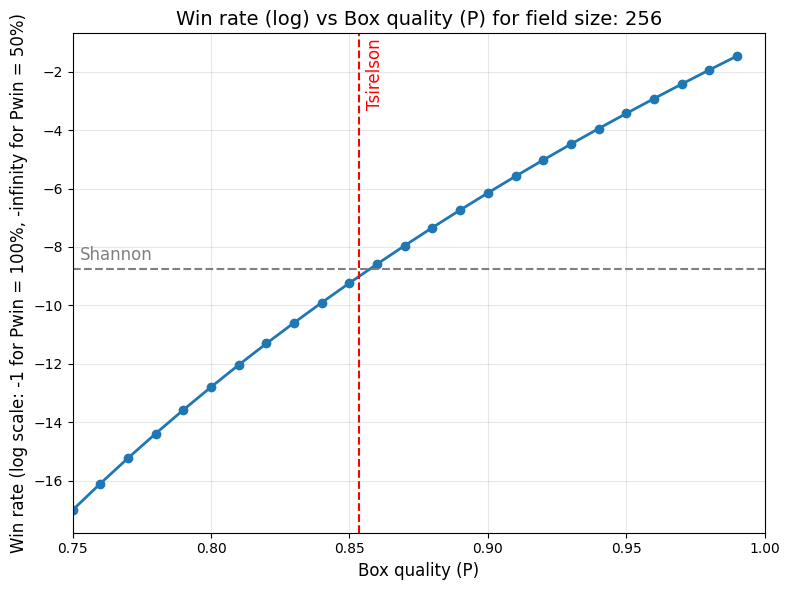

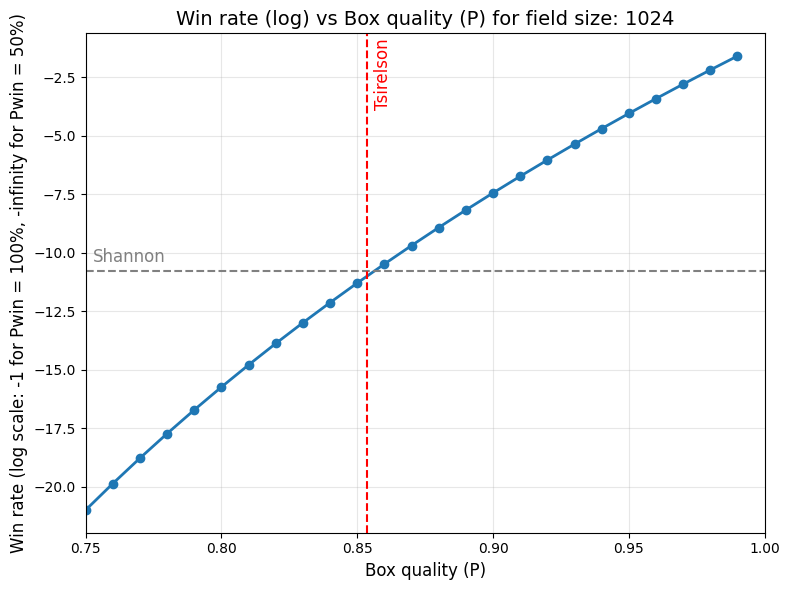

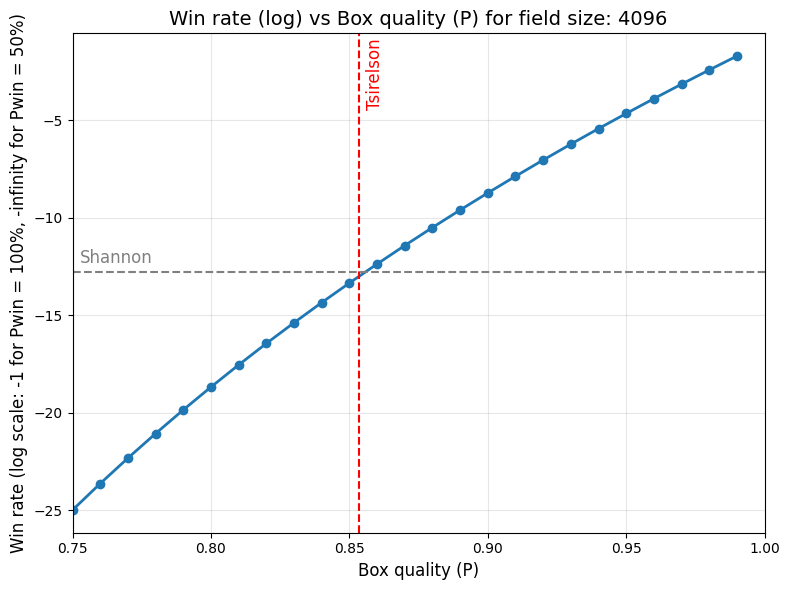

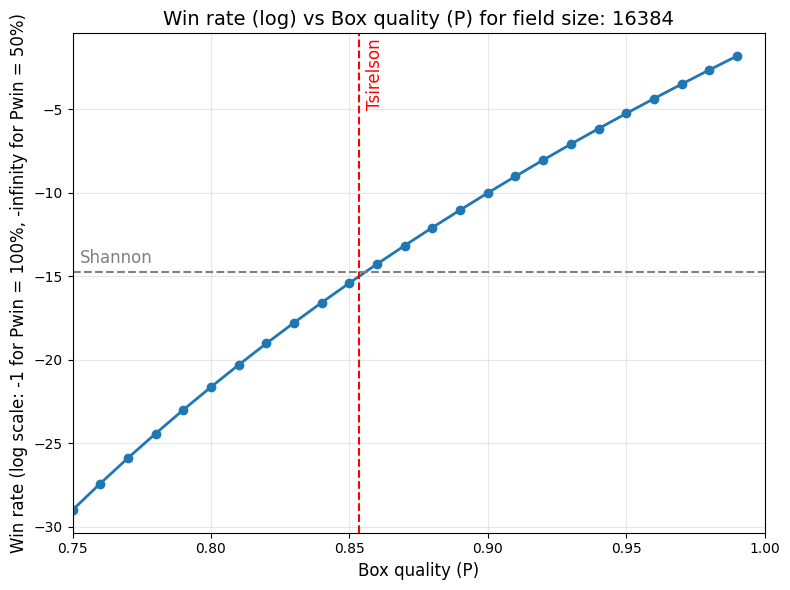

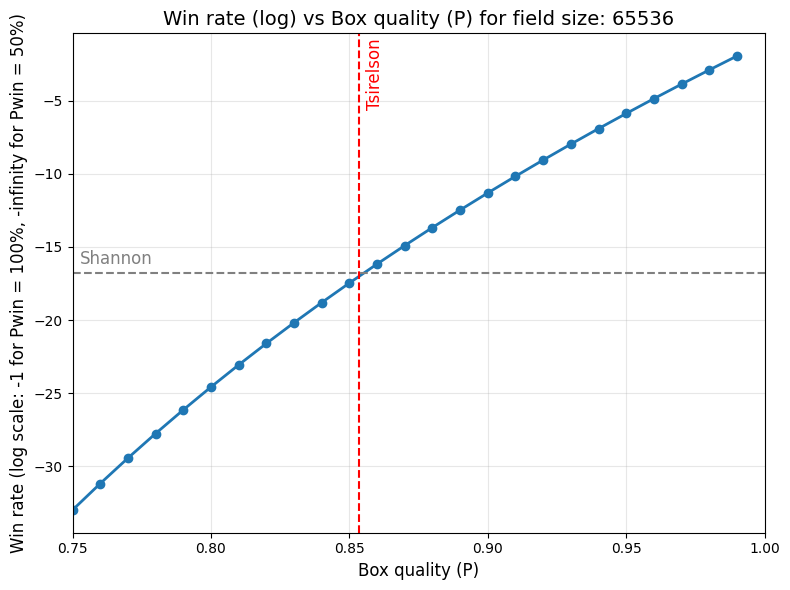

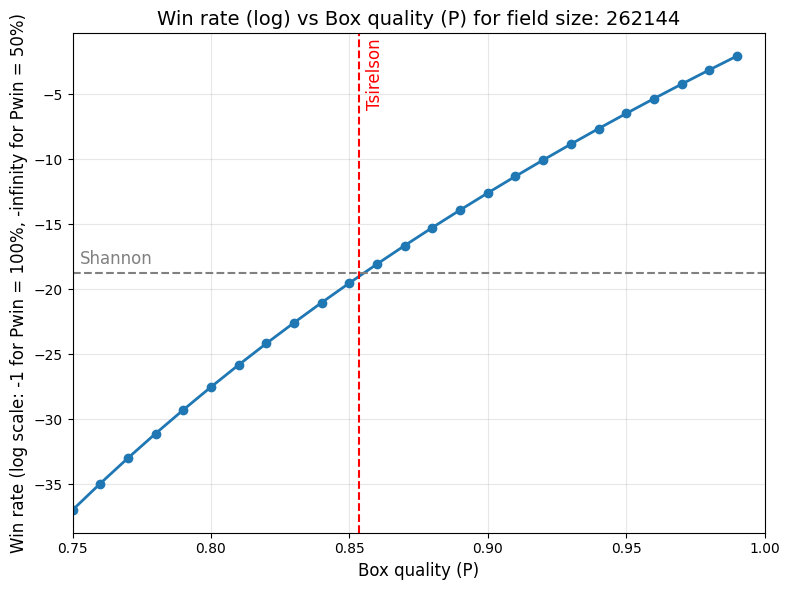

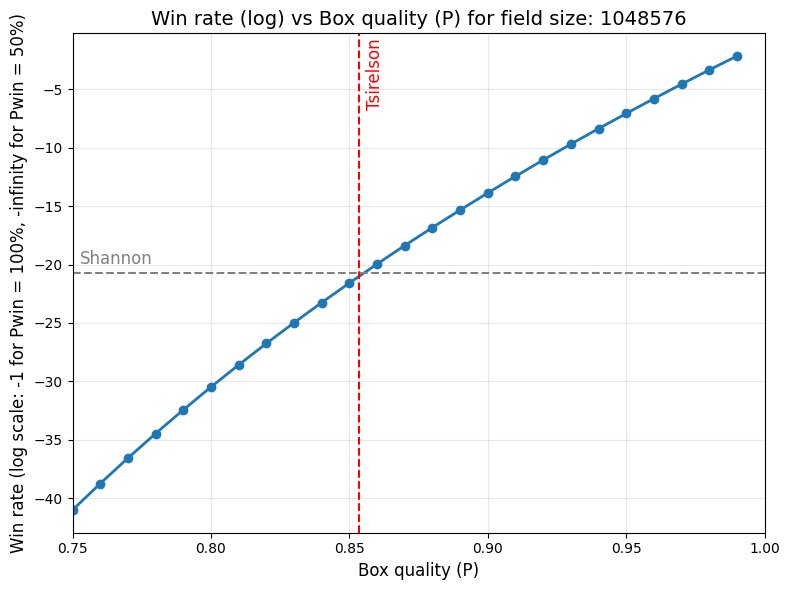

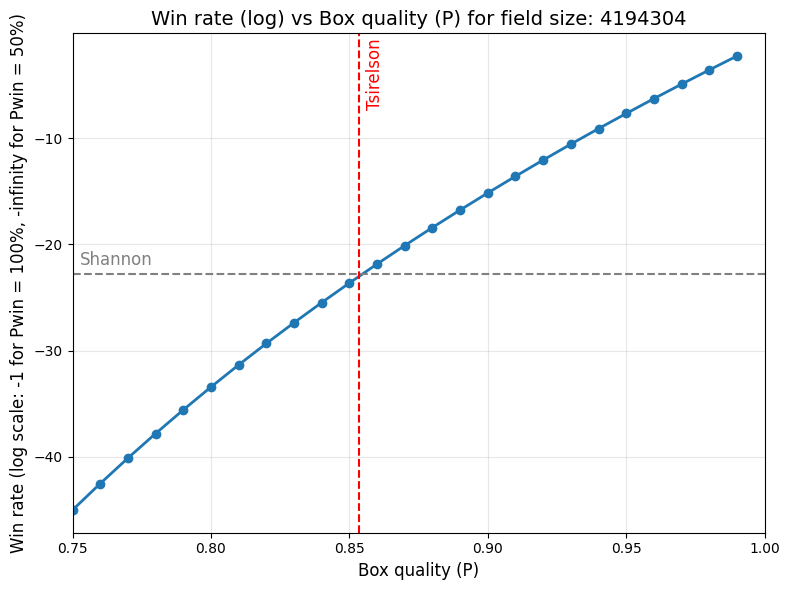

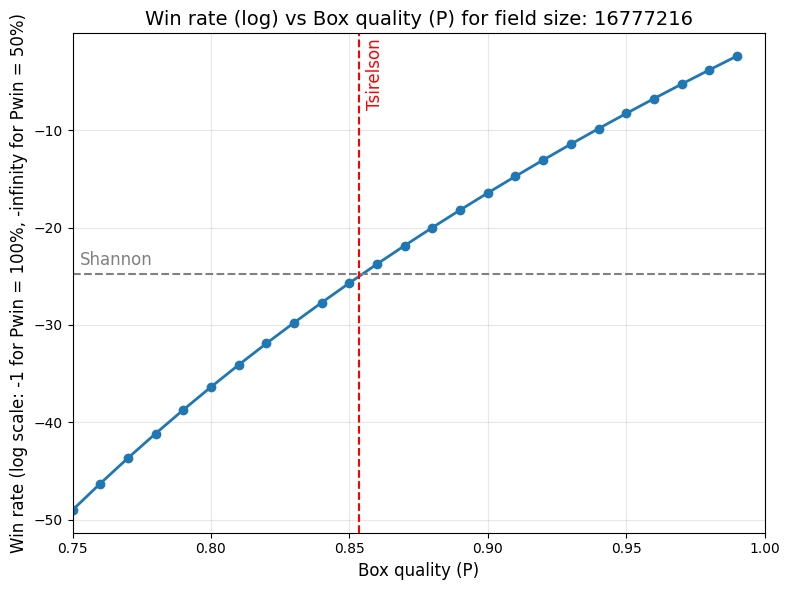

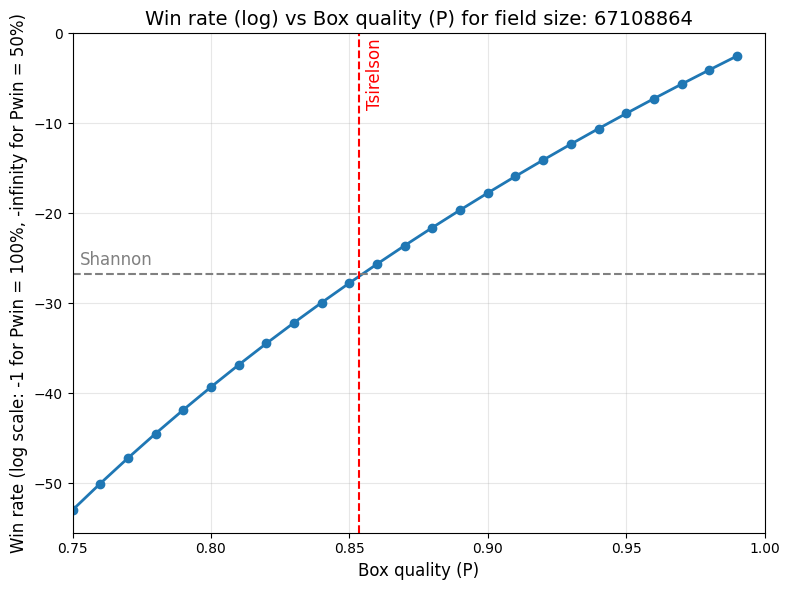

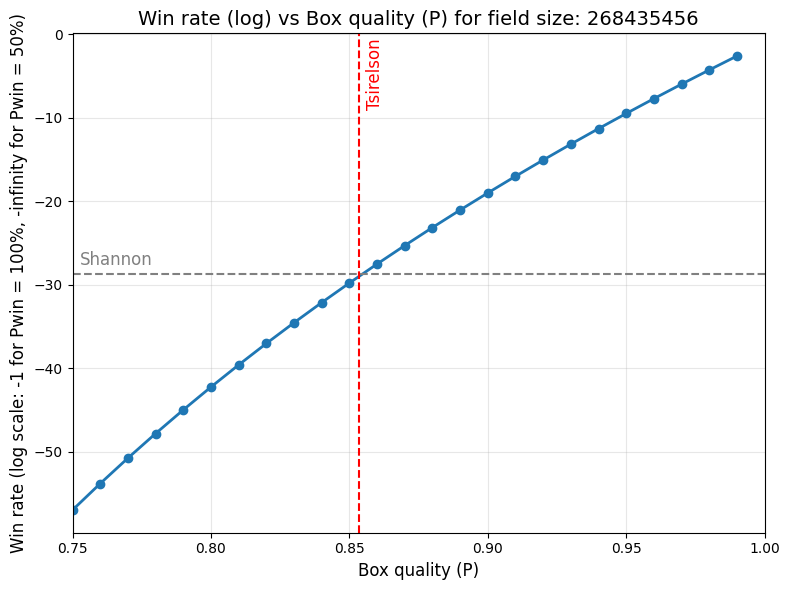

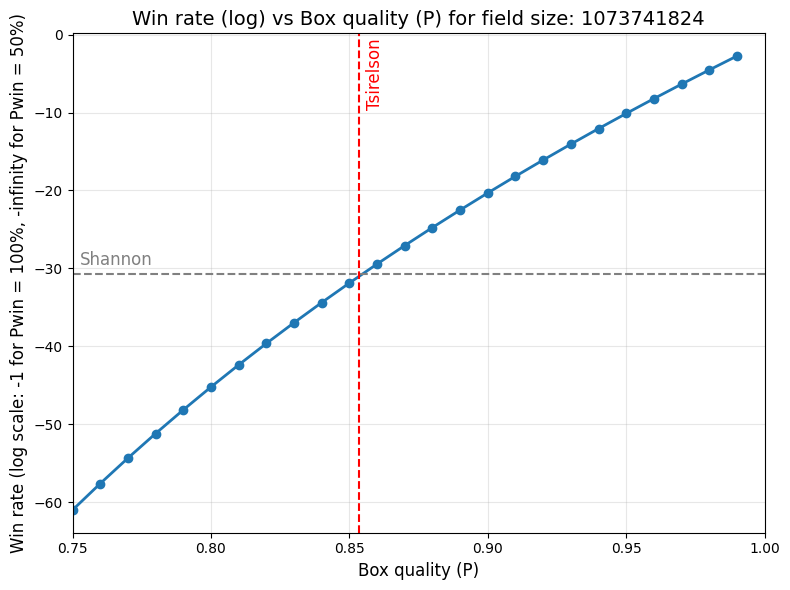

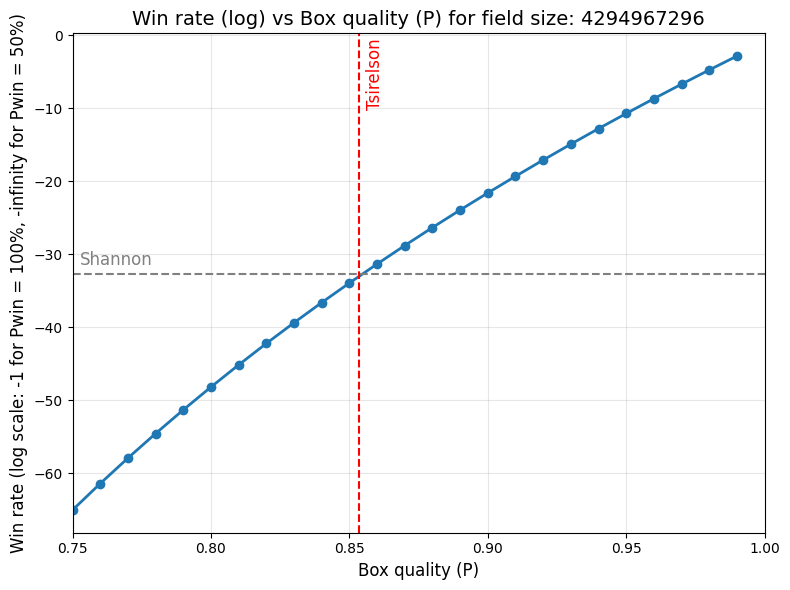

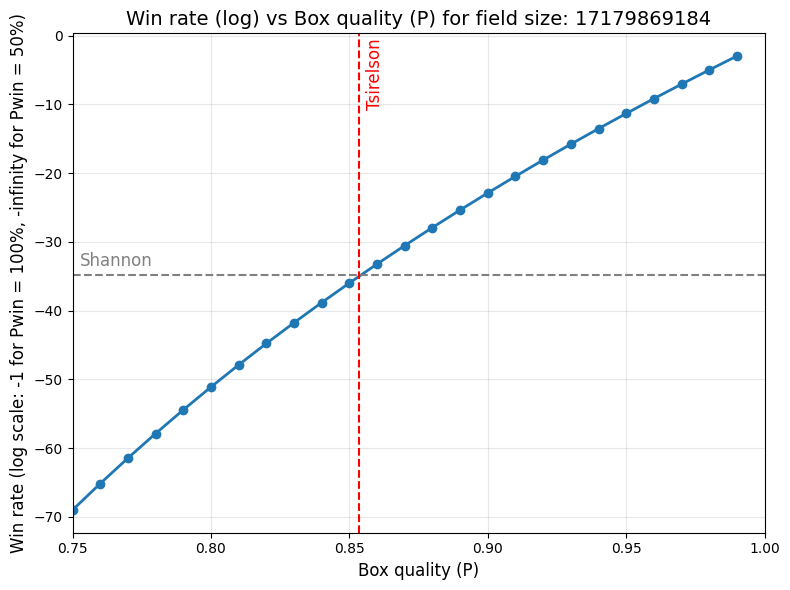

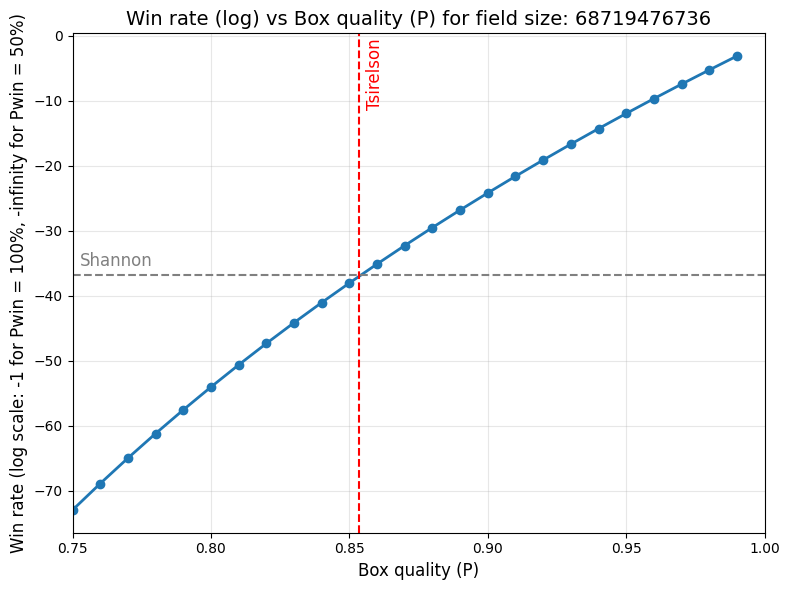

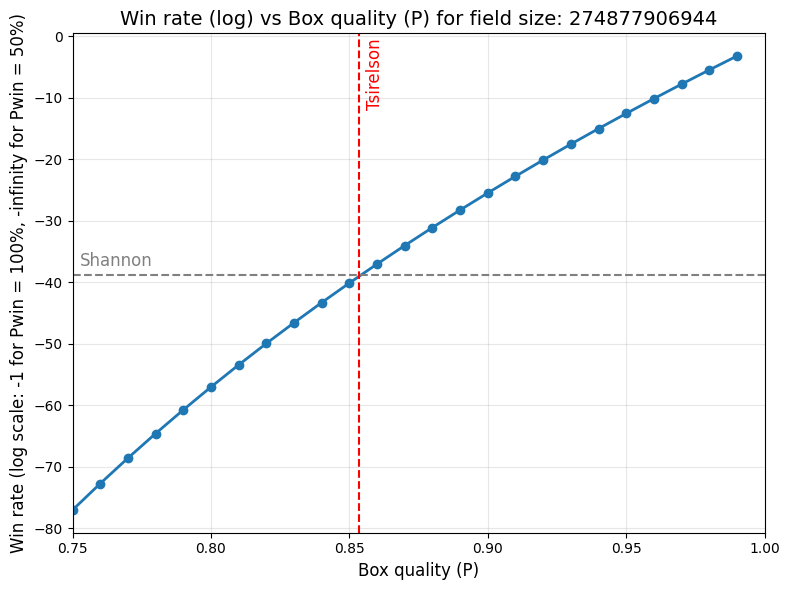

In [62]:
for n in range(2,40,2):
    field_size = 2**n
    calculate(field_size)

In [67]:
import math
from pathlib import Path
import imageio.v3 as iio
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import numpy as np
import pandas as pd

# Generate frames for field sizes 2**n (n = 2..39 step 2) and assemble into an MP4
frames_dir = Path("movie_frames")
frames_dir.mkdir(exist_ok=True)

p_high_values_movie = [n / 100 for n in range(75, 100, 1)]
noise_level_movie = 0.0
m_movie = 1


def ic_limit_large_n2_movie(n2: int, m: int, channel_noise: float) -> float:
    """IC limit p for very large n2 using asymptotic approx when r is tiny."""
    def H_bin(x: float) -> float:
        if x <= 0.0 or x >= 1.0:
            return 0.0
        return -x * math.log2(x) - (1.0 - x) * math.log2(1.0 - x)

    cap = 1.0 - H_bin(channel_noise)
    m_eff = m * cap
    if m_eff <= 0.0:
        return 0.5

    r = m_eff / float(n2)
    if r < 1e-6:
        delta = math.sqrt(r * math.log(2.0) / 2.0)
        return 0.5 + delta

    return QSB.limit_from_mutual_information(
        field_size=int(math.isqrt(n2)),
        comms_size=m,
        channel_noise=channel_noise,
    )


def make_frame(field_size: int, out_path: Path) -> None:
    """Build one frame for the given field size and save to out_path."""
    results_list = []
    n2 = field_size * field_size
    exponent = int(math.log2(n2))

    for p_high in p_high_values_movie:
        ref = QSB.expected_win_rate_assisted(
            field_size=field_size,
            comms_size=m_movie,
            channel_noise=noise_level_movie,
            p_high=p_high,
        )

        base = 2.0 * p_high - 1.0
        ref_log = float("-inf") if base <= 0.0 else -1.0 + exponent * math.log2(base)

        ic_bound = ic_limit_large_n2_movie(n2=n2, m=m_movie, channel_noise=noise_level_movie)
        eps = ic_bound - 0.5
        ic_log_local = math.log2(eps) if eps > 0.0 else float("-inf")

        results_list.append({
            "player_type": f"assisted / p_high={p_high:.2f}",
            "field_size": field_size,
            "noise_level": noise_level_movie,
            "reference": ref,
            "information_constraint": ic_bound,
            "reference_log2": ref_log,
            "information_constraint_log2": ic_log_local,
        })

    results_df_local = pd.DataFrame(results_list)

    p_high_arr_local = np.array(p_high_values_movie, dtype=float)
    ref_log_vals_local = results_df_local["reference_log2"].to_numpy()
    ic_log_line_local = float(ic_log_local)
    p_high_marker = (1 + np.sqrt(2) / 2) / 2

    fig, ax = plt.subplots(figsize=(8, 6))
    ax.plot(p_high_arr_local, ref_log_vals_local, marker="o", linewidth=2, label="ref_log")
    ax.axhline(ic_log_line_local, linestyle="--", color="gray", linewidth=1.5, label="Shannon")
    ax.axvline(p_high_marker, linestyle="--", color="red", linewidth=1.5, label="Tsirelson")

    ax.set_xlabel("Box quality (P)", fontsize=12)
    ax.set_ylabel("Win rate (log scale: -1 for Pwin = 100%, -infinity for Pwin = 50%)", fontsize=12)
    ax.set_title(f"Win rate (log) vs Box quality (P) for field size: {field_size}", fontsize=14)
    ax.grid(True, alpha=0.3)
    ax.set_xlim(0.75, 1.0)

    x_min, x_max = ax.get_xlim()
    y_min, y_max = ax.get_ylim()
    x_pad = 0.01 * (x_max - x_min)
    y_pad = 0.01 * (y_max - y_min)

    ax.text(x_min + x_pad, ic_log_line_local + y_pad, "Shannon",
            ha="left", va="bottom", fontsize=12, color="gray")
    ax.text(p_high_marker + x_pad, y_max - y_pad, "Tsirelson",
            rotation=90, ha="left", va="top", fontsize=12, color="red")

    # Freeze y-ticks to xx.y format
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))

    fig.tight_layout()
    fig.savefig(out_path, dpi=150, bbox_inches="tight")
    plt.close(fig)


# Build all frames
for n in range(2, 40, 2):
    fs = 2 ** n
    frame_path = frames_dir / f"frame_{n:02d}.png"
    make_frame(fs, frame_path)

# Assemble frames into an MP4 (requires imageio-ffmpeg)
frames = [iio.imread(p) for p in sorted(frames_dir.glob("frame_*.png"))]
video_path = Path("field_size_sweep.mp4")
iio.imwrite(video_path, frames, fps=2, codec="libx264")
print(f"Saved {len(frames)} frames to {frames_dir} and video to {video_path}")


IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (1182, 880) to (1184, 880) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).


Saved 19 frames to movie_frames and video to field_size_sweep.mp4
